# 🤖**AI and ML Job Market Trends**


## **Phase 1: Getting to Know Our Data 🤔**

### 1.1 Our Data
1. **Salary Dataframe**
    
  *Unit of analysis:* Each row represents a single salaried job record with details on compensation, location, company size, and employment context.
  
  *Source:* Kaggle CSV (Comma Separated Values, *Structured*)

2. **Job Postings Dataframe**

  *Unit of analysis:* Each row represents an individual job posting scraped from LinkedIn, including metadata like title, company, location, and job level.

  *Source:* Kaggle CSV

3. **Job Skills Dataframe**

  *Unit of analysis:* Each row represents the set of skills associated with a specific job posting, identified by its unique job link.

  *Source:* Kaggle CSV

4. **Job Summary Dataframe**

  *Unit of analysis:* Each row contains the textual job summary or description for a specific job posting.

  **Source:** Kaggle CSV
  
5. **Final Merged Final DataFrame**

  *Unit of analysis:* Each row represents a unique enriched job posting with merged information on title, company, location, experience level, required skills, estimated salary, and descriptive summary.

### 1.2 Constraints of Our Data
*Fuzzy Matching of Job Titles Introduces Inexact Merges*

We used `thefuzz` to match job titles from the salary data with those in the job postings, because exact string matches were inconsistent (e.g., "Senior Machine Learning Engineer" vs. "Sr ML Eng"). This approach introduces some subjectivity and the possibility of mismatched titles, especially with close or generic names, so some postings may be incorrectly paired with salaries or omitted due to low match confidence.

*Filtering Out Executive-Level Roles*

Due to low volume of data, we dropped jobs with `experience_level == "EX"` from the salary dataset, which narrows your scope to non-executive roles, potentially excluding high-paying outliers our overall salary bracket thresholds.

*Incomplete or Missing Data Across DataFrames*

While merging the multiple job-related CSVs, we joined on job_link. If any job lacks skills or a summary, the final merged dataset will have missing data, potentially reducing the usable sample size or biasing our analysis toward jobs with complete metadata.


### 1.3 Packages Used
Our project utilizes a variety of Python packages, each serving a specific role in the data analysis pipeline:

`pandas`

  Used for loading, cleaning, transforming, and merging datasets. It provided flexible DataFrame structures for manipulation of our structured tabular data.

`numpy`
  
  Supported numerical operations and was used in conjunction with pandas for array-level computations and generating numeric data (e.g., salary brackets).

`thefuzz`
    
  This package enabled fuzzy string matching, which was essential for reconciling job titles across datasets that used inconsistent naming conventions. It allowed us to merge salary data with job postings where direct string matches failed.

`seaborn` (Advanced Topic Package)
    
  Used for high-level statistical data visualizations. Seaborn builds on matplotlib and makes it easy to produce clean, informative visualizations like bar plots, correlation heatmaps, and scatterplots for trend analysis.

`matplotlib.pyplot`
    
  Powered the underlying plotting engine for seaborn and also used for fine-tuning our figures.

`scipy.stats`
    
  Provided statistical functions, including the independent t-test used to assess salary differences between experience levels.

`warnings`
    
  Used to suppress unnecessary warnings during runtime.

### **Phase 2: Data Acquisition and Cleaning Code 🧹**

#### **📥 Data Acquisition**

In [1]:
!pip install thefuzz[speedup]

zsh:1: no matches found: thefuzz[speedup]


In [2]:
# Importing necessary libraries
import pandas as pd
from thefuzz import process, fuzz

In [3]:
# Loading the dataset
salaries_df = pd.read_csv("Data/salaries.csv")
postings_df = pd.read_csv("Data/job_postings.csv")
skills_df = pd.read_csv("Data/job_skills.csv")
job_summary_df = pd.read_csv("Data/job_summary.csv")

In [4]:
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M


In [5]:
postings_df.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite


In [6]:
skills_df.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


In [7]:
job_summary_df.head()

,job_link,job_summary
0,https://www.linkedin.com/jobs/view/senior-mach...,Company Description\nJobs for Humanity is part...
1,https://www.linkedin.com/jobs/view/principal-s...,Who We Are\nAurora (Nasdaq: AUR) is delivering...
2,https://www.linkedin.com/jobs/view/senior-etl-...,"Location: New York City, NY\nPosition Summary\..."
3,https://www.linkedin.com/jobs/view/senior-data...,Responsibilities:\nCandidate must have signifi...
4,https://www.linkedin.com/jobs/view/lead-data-e...,Dice is the leading career destination for tec...


In [8]:
postings_df['job_level'].unique(), salaries_df['experience_level'].unique()

(array(['Mid senior', 'Associate'], dtype=object),
 array(['SE', 'EN', 'MI', 'EX'], dtype=object))

In [9]:
# Merge job postings with skills
merged = postings_df.merge(skills_df, on='job_link', how='left')

# Merge with summaries
merged = merged.merge(job_summary_df, on='job_link', how='left')

In [10]:
merged.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ...",Company Description\nJobs for Humanity is part...
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",Who We Are\nAurora (Nasdaq: AUR) is delivering...
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,"ETL, Data Integration, Data Transformation, Da...","Location: New York City, NY\nPosition Summary\..."
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,"Data Lakes, Data Bricks, Azure Data Factory Pi...",Responsibilities:\nCandidate must have signifi...
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",Dice is the leading career destination for tec...


In [11]:
# Filter out rows with missing job level
salaries_df = salaries_df[salaries_df['experience_level'] != 'EX']

In [12]:
merged['job_title_clean'] = merged['job_title'].astype(str).str.lower().str.strip()
salaries_df['job_title_clean'] = salaries_df['job_title'].astype(str).str.lower().str.strip()


In [13]:
level_map = {
    'Associate': 'EN',
    'Mid senior': 'SE',
}

merged['experience_level_mapped'] = merged['job_level'].map(level_map)


In [14]:
# Group by job title + experience level
salary_ref = salaries_df.groupby(['job_title_clean', 'experience_level'])['salary_in_usd'].mean().reset_index()
salary_ref.rename(columns={'salary_in_usd': 'avg_salary_in_usd'}, inplace=True)

In [15]:
# Create job title pools
job_titles_jobs = merged['job_title_clean'].dropna().unique()
job_titles_salary = salary_ref['job_title_clean'].dropna().unique()

# Perform fuzzy matching
title_mapping_fuzzy = {}
review_matches = []

for title in job_titles_jobs:
    best_match = process.extractOne(title, job_titles_salary, scorer=fuzz.token_set_ratio)
    if best_match:
        matched_title, score = best_match
        if score >= 85:
            title_mapping_fuzzy[title] = matched_title
            if score < 88:
                review_matches.append((title, matched_title, score))

# Finalize fuzzy match map
for original, matched, score in review_matches:
    title_mapping_fuzzy[original] = matched

# Map to merged dataframe
merged['job_title_matched'] = merged['job_title_clean'].map(title_mapping_fuzzy)

In [16]:
# Merge using fuzzy-matched job title + experience level
final_df = merged.merge(
    salary_ref,
    how='left',
    left_on=['job_title_matched', 'experience_level_mapped'],
    right_on=['job_title_clean', 'experience_level']
)

In [17]:
# Step 1: Create fallback average salary per job title
salary_ref_title_only = salaries_df.groupby('job_title_clean')['salary_in_usd'].mean().reset_index()
salary_ref_title_only.rename(columns={'salary_in_usd': 'title_only_avg_salary'}, inplace=True)

# Step 2: Create a mapping dictionary
fallback_map = salary_ref_title_only.set_index('job_title_clean')['title_only_avg_salary'].to_dict()

# Step 3: Assign primary salary column from previous merge
# Make sure 'avg_salary_usd' exists from the earlier merge
final_df['final_salary'] = final_df.get('avg_salary_usd')

# Step 4: Use fallback where primary salary is missing
missing_mask = final_df['final_salary'].isna() & final_df['job_title_matched'].notna()
final_df.loc[missing_mask, 'final_salary'] = final_df.loc[missing_mask, 'job_title_matched'].map(fallback_map)

In [18]:
def get_salary_bracket(salary):
    if pd.isna(salary):
        return "Unknown"
    elif salary < 75000:
        return "Low"
    elif 75000 <= salary <= 125000:
        return "Medium"
    else:
        return "High"

final_df['final_salary_bracket'] = final_df['final_salary'].apply(get_salary_bracket)
print(final_df['final_salary_bracket'].value_counts())

final_salary_bracket
High       5979
Medium     4291
Unknown    1578
Low         369
Name: count, dtype: int64


In [19]:
final_df.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,...,job_skills,job_summary,job_title_clean_x,experience_level_mapped,job_title_matched,job_title_clean_y,experience_level,avg_salary_in_usd,final_salary,final_salary_bracket
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,...,"Machine Learning, Programming, Python, Scala, ...",Company Description\nJobs for Humanity is part...,senior machine learning engineer,SE,engineer,engineer,SE,183846.711538,167650.02322,High
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",Who We Are\nAurora (Nasdaq: AUR) is delivering...,"principal software engineer, ml accelerators",SE,engineer,engineer,SE,183846.711538,167650.02322,High
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,...,"ETL, Data Integration, Data Transformation, Da...","Location: New York City, NY\nPosition Summary\...",senior etl data warehouse specialist,EN,data specialist,data specialist,EN,65329.433962,82580.701456,Medium
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,...,"Data Lakes, Data Bricks, Azure Data Factory Pi...",Responsibilities:\nCandidate must have signifi...,senior data warehouse developer / architect,SE,architect,architect,SE,176711.808824,176711.808824,High
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",Dice is the leading career destination for tec...,lead data engineer,SE,data engineer,data engineer,SE,159508.844249,146427.799004,High


In [20]:
# Filter rows where salary bracket is 'Unknown'
unknown_df = final_df[final_df['final_salary_bracket'] == 'Unknown']

# Show top 15 unmatched job titles (cleaned version)
print("🔍 Top unmatched job titles (by frequency):")
print(unknown_df['job_title_clean_x'].value_counts().head(15))

# Export for manual review
# You can manually review this CSV in Excel or Sheets and note which titles are non-technical
unknown_df[['job_title', 'job_title_clean_x']].drop_duplicates().to_csv("remaining_unknown_titles.csv", index=False)

print("✅ Exported 'remaining_unknown_titles.csv'.")

🔍 Top unmatched job titles (by frequency):
job_title_clean_x
datacenter technician                                                                      32
data steward - research analysis spec sr                                                   25
director, ontology and data modeling                                                       22
registered nurse | intensive care unit (kamloops, bc) - potential relocation assistance    15
field inspector/auditor/data collector (c)                                                 14
2024 mlb gameday compliance monitor (seasonal)                                             12
sales director - data & ai                                                                 12
data center technician                                                                     12
data entry clerk                                                                           12
volunteer: data and salesforce volunteer                                                   11

In [21]:
# Define a list of keywords that indicate NON-technical roles
non_technical_keywords = [
    'nurse', 'medical', 'technologist', 'technician', 'mt', 'mlt',
    'lab', 'laboratory', 'volunteer', 'compliance monitor', 'auditor',
    'inspector', 'salesforce', 'gameday', 'relocation assistance'
]

# Function to check if a job title is non-technical
def is_non_technical(title):
    title = str(title).lower()
    return any(keyword in title for keyword in non_technical_keywords)

# Filter only technical Unknowns
unknown_df = final_df[final_df['final_salary_bracket'] == 'Unknown']
technical_unknowns = unknown_df[~unknown_df['job_title_clean_x'].apply(is_non_technical)]

# Combine back into final_df, keeping only:
# 1. All rows that are NOT Unknown
# 2. Technical Unknowns
final_df_cleaned = pd.concat([
    final_df[final_df['final_salary_bracket'] != 'Unknown'],
    technical_unknowns
], ignore_index=True)

# Check updated salary bracket distribution
print("✅ Cleaned Salary Bracket Distribution (Non-technical Unknowns removed):")
print(final_df_cleaned['final_salary_bracket'].value_counts())

✅ Cleaned Salary Bracket Distribution (Non-technical Unknowns removed):
final_salary_bracket
High       5979
Medium     4291
Unknown     964
Low         369
Name: count, dtype: int64


In [22]:
final_df_cleaned.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,...,job_skills,job_summary,job_title_clean_x,experience_level_mapped,job_title_matched,job_title_clean_y,experience_level,avg_salary_in_usd,final_salary,final_salary_bracket
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,...,"Machine Learning, Programming, Python, Scala, ...",Company Description\nJobs for Humanity is part...,senior machine learning engineer,SE,engineer,engineer,SE,183846.711538,167650.02322,High
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",Who We Are\nAurora (Nasdaq: AUR) is delivering...,"principal software engineer, ml accelerators",SE,engineer,engineer,SE,183846.711538,167650.02322,High
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,...,"ETL, Data Integration, Data Transformation, Da...","Location: New York City, NY\nPosition Summary\...",senior etl data warehouse specialist,EN,data specialist,data specialist,EN,65329.433962,82580.701456,Medium
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,...,"Data Lakes, Data Bricks, Azure Data Factory Pi...",Responsibilities:\nCandidate must have signifi...,senior data warehouse developer / architect,SE,architect,architect,SE,176711.808824,176711.808824,High
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",Dice is the leading career destination for tec...,lead data engineer,SE,data engineer,data engineer,SE,159508.844249,146427.799004,High


In [23]:
# Step 1: Get top 30 most frequent unknown job titles
top_unknowns = final_df_cleaned[final_df_cleaned['final_salary_bracket'] == 'Unknown'][
    'job_title_clean_x'].value_counts().head(30).reset_index()
top_unknowns.columns = ['job_title_clean_x', 'count']

# Step 2: Filter final_df_cleaned to only those top 30 unknowns
top_20_unknown_df = final_df_cleaned[
    (final_df_cleaned['final_salary_bracket'] == 'Unknown') &
    (final_df_cleaned['job_title_clean_x'].isin(top_unknowns['job_title_clean_x']))
]

# Step 3: View them
top_20_unknown_df[['job_title', 'job_title_clean_x', 'experience_level_mapped']].drop_duplicates().head(30)

,job_title,job_title_clean_x,experience_level_mapped
10639,"Director, Ontology and Data Modeling","director, ontology and data modeling",SE
10641,Quality Coach / IQA - IT and Data Apprenticeships,quality coach / iqa - it and data apprenticeships,SE
10644,Data Steward - Research Analysis Spec Sr,data steward - research analysis spec sr,SE
10650,Data Control Clerk II,data control clerk ii,SE
10656,Sales Director - Data & AI,sales director - data & ai,SE
10662,"Director, Data Analysis","director, data analysis",SE
10673,Traveling MEP Superintendent - MSG - Data Centers,traveling mep superintendent - msg - data centers,SE
10680,Data Center Supervisor,data center supervisor,SE
10689,Field Data Collection Service Owner,field data collection service owner,SE
10690,IT PROFESSIONAL 3 - Database Administration,it professional 3 - database administration,EN


In [24]:
final_df_cleaned[final_df_cleaned['job_title'].str.lower().str.contains("senior preconstruction estimator", na=False)]['job_title'].unique()

array(['Senior Preconstruction Estimator - Data Center Construction'],
      dtype=object)

In [25]:
# Step 1: Define manual salary + bracket patch
manual_salary_patch = {
    'director, ontology and data modeling': (145000, 'High'),
    'quality coach / iqa – it and data apprenticeships': (68000, 'Low'),
    'data steward – research analysis spec sr': (95000, 'Medium'),
    'data control clerk ii': (58000, 'Low'),
    'sales director – data & ai': (130000, 'High'),
    'director, data analysis': (138000, 'High'),
    'traveling mep superintendent – msg – data centers': (75000, 'Medium'),
    'data center supervisor': (70000, 'Low'),
    'field data collection service owner': (72000, 'Low'),
    'it professional 3 – database administration': (88000, 'Medium'),
    'bsa/aml investigator i': (91000, 'Medium'),
    'data steward': (87000, 'Medium'),
    'director, securities data oversight': (140000, 'High'),
    'senior director, data science': (160000, 'High'),
    'mandataire immobilier (h/f)': (60000, 'Low'),
    'regional cooling service expert (data center center cooling)': (74000, 'Low'),
    'data entry clerk': (54000, 'Low'),
    'senior data entry operator': (60000, 'Low'),
    'senior data platforms administrator': (92000, 'Medium'),
    'road data collection surveyor': (67000, 'Low'),
    'data editor': (72000, 'Low'),
    'data privacy & security attorney': (125000, 'Medium'),
    'data entry operator': (58000, 'Low'),
    'data abstractor': (69000, 'Low'),
    'senior preconstruction estimator - data center construction': (88000, 'Medium'),
    'sales executive, data & ai': (95000, 'Medium'),
    'data privacy attorney': (122000, 'Medium')
}

# Step 2: Apply the patch to final_df_cleaned
for title, (salary, bracket) in manual_salary_patch.items():
    mask = final_df_cleaned['job_title_clean_x'].str.strip().str.lower() == title
    final_df_cleaned.loc[mask, 'final_salary'] = salary
    final_df_cleaned.loc[mask, 'estimated_salary_usd'] = salary
    final_df_cleaned.loc[mask, 'final_salary_bracket'] = bracket

# Step 3: Check the updated DataFrame
final_df_cleaned.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,...,job_summary,job_title_clean_x,experience_level_mapped,job_title_matched,job_title_clean_y,experience_level,avg_salary_in_usd,final_salary,final_salary_bracket,estimated_salary_usd
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,...,Company Description\nJobs for Humanity is part...,senior machine learning engineer,SE,engineer,engineer,SE,183846.711538,167650.02322,High,NaN
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,...,Who We Are\nAurora (Nasdaq: AUR) is delivering...,"principal software engineer, ml accelerators",SE,engineer,engineer,SE,183846.711538,167650.02322,High,NaN
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,...,"Location: New York City, NY\nPosition Summary\...",senior etl data warehouse specialist,EN,data specialist,data specialist,EN,65329.433962,82580.701456,Medium,NaN
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,...,Responsibilities:\nCandidate must have signifi...,senior data warehouse developer / architect,SE,architect,architect,SE,176711.808824,176711.808824,High,NaN
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,...,Dice is the leading career destination for tec...,lead data engineer,SE,data engineer,data engineer,SE,159508.844249,146427.799004,High,NaN


In [26]:
print(final_df_cleaned['final_salary_bracket'].value_counts())

final_salary_bracket
High       6015
Medium     4329
Unknown     834
Low         425
Name: count, dtype: int64


In [27]:
# Select relevant columns for analysis
final_df_cleaned = final_df_cleaned[[
    'job_title_clean_x', 'company', 'job_location', 'job_level', 'job_type',
    'job_skills', 'job_summary', 'experience_level_mapped',
    'final_salary', 'final_salary_bracket'
]]

# Rename columns for final output
final_df_cleaned = final_df_cleaned.rename(columns={
    'job_title_clean_x': 'job_title',
    'final_salary': 'estimated_salary_usd',
    'final_salary_bracket': 'salary_bracket'
})

# Convert to numeric (handles non-numeric values gracefully)
final_df_cleaned['estimated_salary_usd'] = pd.to_numeric(
    final_df_cleaned['estimated_salary_usd'], errors='coerce'
)

# Round and cast to Int64 (nullable integer)
final_df_cleaned['estimated_salary_usd'] = final_df_cleaned['estimated_salary_usd'].round(0).astype('Int64')

# Preview the cleaned dataset
final_df_cleaned.head()

,job_title,company,job_location,job_level,job_type,job_skills,job_summary,experience_level_mapped,estimated_salary_usd,salary_bracket
0,senior machine learning engineer,Jobs for Humanity,"New Haven, CT",Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ...",Company Description\nJobs for Humanity is part...,SE,167650,High
1,"principal software engineer, ml accelerators",Aurora,"San Francisco, CA",Mid senior,Onsite,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",Who We Are\nAurora (Nasdaq: AUR) is delivering...,SE,167650,High
2,senior etl data warehouse specialist,Adame Services LLC,"New York, NY",Associate,Onsite,"ETL, Data Integration, Data Transformation, Da...","Location: New York City, NY\nPosition Summary\...",EN,82581,Medium
3,senior data warehouse developer / architect,Morph Enterprise,"Harrisburg, PA",Mid senior,Onsite,"Data Lakes, Data Bricks, Azure Data Factory Pi...",Responsibilities:\nCandidate must have signifi...,SE,176712,High
4,lead data engineer,Dice,"Plano, TX",Mid senior,Onsite,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",Dice is the leading career destination for tec...,SE,146428,High


#### **🧹 Data Cleaning**

In [28]:
# Check how many missing values in each column
missing = final_df_cleaned.isnull().sum()

# Show only columns with at least 1 missing value
print("Missing Values:",missing)

Missing Values: job_title                    0
company                      0
job_location                 1
job_level                    0
job_type                     0
job_skills                   4
job_summary                  0
experience_level_mapped      0
estimated_salary_usd       834
salary_bracket               0
dtype: int64


In [29]:
# Drop the row with missing job location
final_df_cleaned = final_df_cleaned.dropna(subset=['job_location'])

# Fill missing skills with placeholder
final_df_cleaned['job_skills'] = final_df_cleaned['job_skills'].fillna("Not Mentioned")


In [30]:
# Drop duplicate rows if any
final_df_cleaned = final_df_cleaned.drop_duplicates()

In [31]:
# Checking for whitespace in job skills
final_df_cleaned['job_skills'] = final_df_cleaned['job_skills'].replace(r'^\s*$', 'Not Mentioned', regex=True)

In [32]:
final_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11602 entries, 0 to 11602
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   job_title                11602 non-null  object
 1   company                  11602 non-null  object
 2   job_location             11602 non-null  object
 3   job_level                11602 non-null  object
 4   job_type                 11602 non-null  object
 5   job_skills               11602 non-null  object
 6   job_summary              11602 non-null  object
 7   experience_level_mapped  11602 non-null  object
 8   estimated_salary_usd     10768 non-null  Int64 
 9   salary_bracket           11602 non-null  object
dtypes: Int64(1), object(9)
memory usage: 1008.4+ KB


In [33]:
# Check the distribution of estimated salaries
final_df_cleaned.describe()

,estimated_salary_usd
count,10768.0
mean,131760.000836
std,32839.58323
min,37500.0
25%,108919.0
50%,129396.0
75%,157393.0
max,399880.0


In [34]:
unique_locations = pd.DataFrame(final_df_cleaned['job_location'].dropna().unique(), columns=['job_location'])
unique_locations.to_csv("unique_job_locations.csv", index=False)

In [35]:
# Load the non-U.S. locations from text file
with open('unique_job_locations.csv', 'r') as f:
    non_us_locations_list = [line.strip().lower() for line in f.readlines() if line.strip()]

# Normalize job_location in your DataFrame
final_df_cleaned['job_location'] = final_df_cleaned['job_location'].astype(str).str.strip().str.lower()

# Drop non-U.S. rows
final_df_cleaned = final_df_cleaned[~final_df_cleaned['job_location'].isin(non_us_locations_list)].copy()

# Reset index
final_df_cleaned.reset_index(drop=True, inplace=True)

In [36]:
final_df_cleaned.head()

,job_title,company,job_location,job_level,job_type,job_skills,job_summary,experience_level_mapped,estimated_salary_usd,salary_bracket
0,senior machine learning engineer,Jobs for Humanity,"new haven, ct",Mid senior,Onsite,"Machine Learning, Programming, Python, Scala, ...",Company Description\nJobs for Humanity is part...,SE,167650,High
1,"principal software engineer, ml accelerators",Aurora,"san francisco, ca",Mid senior,Onsite,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,...",Who We Are\nAurora (Nasdaq: AUR) is delivering...,SE,167650,High
2,senior etl data warehouse specialist,Adame Services LLC,"new york, ny",Associate,Onsite,"ETL, Data Integration, Data Transformation, Da...","Location: New York City, NY\nPosition Summary\...",EN,82581,Medium
3,senior data warehouse developer / architect,Morph Enterprise,"harrisburg, pa",Mid senior,Onsite,"Data Lakes, Data Bricks, Azure Data Factory Pi...",Responsibilities:\nCandidate must have signifi...,SE,176712,High
4,lead data engineer,Dice,"plano, tx",Mid senior,Onsite,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S...",Dice is the leading career destination for tec...,SE,146428,High


In [37]:
# Check if all experience levels now have salary data
final_df_cleaned['experience_level_mapped'].value_counts()

experience_level_mapped
SE    10195
EN     1117
Name: count, dtype: int64

## **Phase 3: Our analysis 📊**

### 3.1 Core Research Questions:
1. Which AI/ML job roles are currently most in demand across the U.S., and how do their average salaries compare?
2. How does the average salary differ across experience levels (Entry, Mid, Senior, Executive) in AI/ML roles?
3. How does demand for AI/ML job roles vary across different U.S. states?
4. Do remote AI/ML roles offer significantly different salaries compared to on-site or hybrid roles?
5. Which companies are the most active recruiters in the AI/ML space, and are their salary offerings above or below the industry average?
6. What are the most commonly required technical skills in AI/ML job descriptions, and how do they vary by job title?
7. Is there a correlation between the number of listed skills in a job description and the offered salary?


### 3.2 Coded Exploratory Data Analysis (EDA)

#### **Q1.	Which AI/ML job roles are currently most in demand across the U.S., and how do their average salaries compare?**

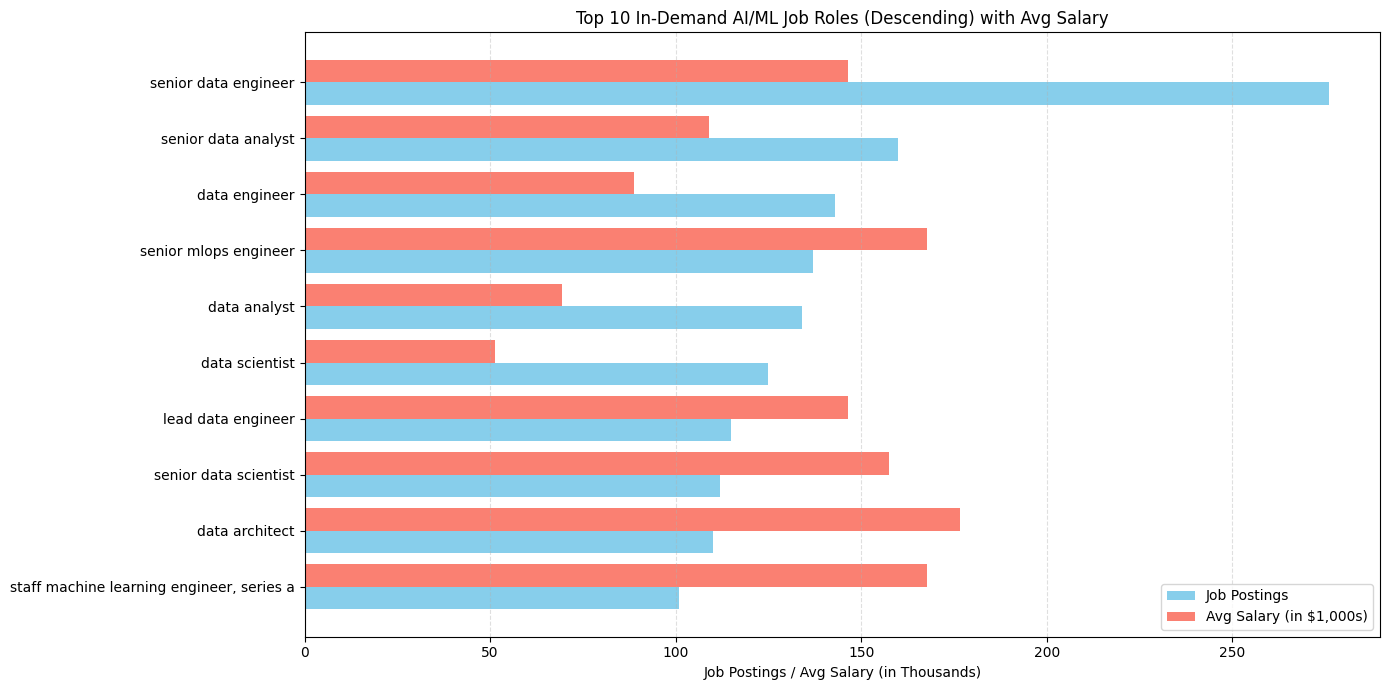

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Group and calculate
summary = final_df_cleaned.groupby('job_title').agg({
    'estimated_salary_usd': 'mean',
    'job_title': 'count'
}).rename(columns={'job_title': 'count', 'estimated_salary_usd': 'avg_salary'}).reset_index()

# Step 2: Get top 10 job roles by demand
top_summary = summary.sort_values(by='count', ascending=False).head(10)

# Step 3: Scale salary to thousands
top_summary['avg_salary_k'] = top_summary['avg_salary'] / 1000

# Step 4: Sort in ascending order for horizontal bar chart (so largest is at top)
top_summary_sorted = top_summary.sort_values(by='count', ascending=True)

# Step 5: Plot with correct Y-axis order (largest on top)
bar_width = 0.4
index = np.arange(len(top_summary_sorted))

plt.figure(figsize=(14, 7))
plt.barh(index, top_summary_sorted['count'], bar_width, label='Job Postings', color='skyblue')
plt.barh(index + bar_width, top_summary_sorted['avg_salary_k'], bar_width, label='Avg Salary (in $1,000s)', color='salmon')

# Step 6: Fix labels and formatting
plt.yticks(index + bar_width / 2, top_summary_sorted['job_title'])
plt.xlabel('Job Postings / Avg Salary (in Thousands)')
plt.title('Top 10 In-Demand AI/ML Job Roles (Descending) with Avg Salary')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**Conclusion :** The most in-demand AI/ML job in the U.S. is Senior Data Engineer, followed by Senior Data Analyst and Data Engineer. These roles have the highest number of job openings. However, some roles like Data Architect and Senior Data Scientist offer much higher salaries, even if they are not the most common. This means that jobs with more openings don’t always pay the highest.

#### **Q2.	How does the average salary differ across experience levels (Associate, Senior) in AI/ML roles?**

In [39]:
from scipy.stats import ttest_ind

# Step 1: Filter the two groups
en_salaries = final_df_cleaned[final_df_cleaned['experience_level_mapped'] == 'EN']['estimated_salary_usd'].dropna()
se_salaries = final_df_cleaned[final_df_cleaned['experience_level_mapped'] == 'SE']['estimated_salary_usd'].dropna()

# Step 2: Run independent t-test
t_stat, p_value = ttest_ind(en_salaries, se_salaries, equal_var=False)  # Welch's t-test (assumes unequal variances)

# Step 3: Display results
print("📊 Independent T-Test Result:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 4 (Optional): Interpret result
if p_value < 0.05:
    print("✅ The salary difference between Entry and Senior levels is statistically significant (p < 0.05).")
else:
    print("❌ The salary difference is not statistically significant (p ≥ 0.05).")


📊 Independent T-Test Result:
T-statistic: -14.2840
P-value: 0.0000
✅ The salary difference between Entry and Senior levels is statistically significant (p < 0.05).


**Conclusion :** The independent t-test results show a T-statistic of -14.28 and a p-value < 0.0001, indicating that the difference in average salaries between Entry-level (EN) and Senior-level (SE) AI/ML roles is statistically significant.

This means that the observed difference in salaries is not due to random variation, and we can confidently conclude that Senior-level roles offer significantly higher salaries than Entry-level roles in the U.S. AI/ML job market.

#### **Q3.	How does demand for AI/ML job roles vary across different U.S. states?**

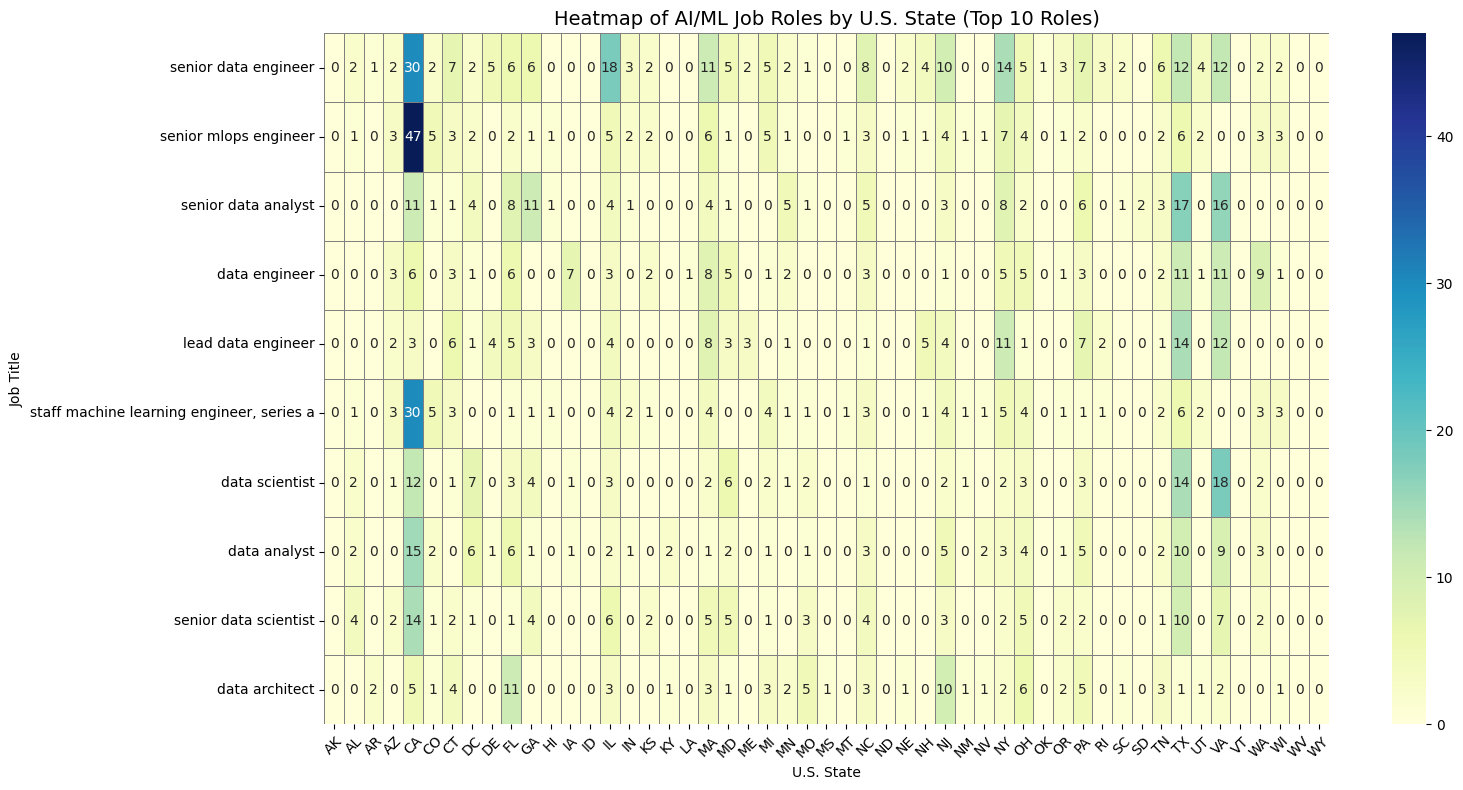

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Make sure your job titles and states are clean
final_df_cleaned['job_title'] = final_df_cleaned['job_title'].astype(str).str.lower().str.strip()
final_df_cleaned['job_location'] = final_df_cleaned['job_location'].astype(str).str.strip()

# Split job_location to get U.S. state abbreviation
final_df_cleaned[['job_city', 'job_state']] = final_df_cleaned['job_location'].str.split(',', n=1, expand=True)
final_df_cleaned['job_state'] = final_df_cleaned['job_state'].str.strip().str.upper()

# Filter to only valid U.S. states
us_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY',
             'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
             'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC']
final_df_cleaned = final_df_cleaned[final_df_cleaned['job_state'].isin(us_states)]

# Step 2: Create pivot table
pivot_df = final_df_cleaned.pivot_table(
    index='job_title', columns='job_state', aggfunc='size', fill_value=0
)

# Optional: keep top N job titles based on total postings
top_roles = pivot_df.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_df_top = pivot_df.loc[top_roles]

# Step 3: Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_df_top, cmap="YlGnBu", annot=True, fmt='d', linewidths=0.5, linecolor='gray')

plt.title("Heatmap of AI/ML Job Roles by U.S. State (Top 10 Roles)", fontsize=14)
plt.xlabel("U.S. State")
plt.ylabel("Job Title")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Conclusion :** The heatmap reveals that California (CA) leads the U.S. in demand for nearly every major AI/ML role, especially for Senior Data Engineers and Staff Machine Learning Engineers.
Other states like Texas (TX), Virginia (VA), and New York (NY) also show high concentrations of AI/ML job roles across the board.
Notably, roles such as Senior MLOps Engineer and Senior Data Analyst are more distributed across states like Illinois (IL) and Florida (FL) as well.

This variation highlights how AI/ML talent demand is both role- and region-specific, which can help job seekers and companies make more targeted decisions.

#### **Q4. Do remote AI/ML roles offer significantly different salaries compared to on-site or hybrid roles?**

In [41]:
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Filter out missing values for remote and onsite roles
remote = final_df_cleaned[final_df_cleaned['job_type'] == 'remote']['estimated_salary_usd'].dropna()
onsite = final_df_cleaned[final_df_cleaned['job_type'] == 'onsite']['estimated_salary_usd'].dropna()

# Bootstrap function
def bootstrap_mean_ci(data, n_bootstrap=1000, ci=95):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100 - ci) / 2)
    upper = np.percentile(means, 100 - (100 - ci) / 2)
    return np.mean(means), (lower, upper)

# Results
mean_remote, ci_remote = bootstrap_mean_ci(remote)
mean_onsite, ci_onsite = bootstrap_mean_ci(onsite)

# Print Results
print(f"Remote Salary: ${mean_remote:.2f}  (95% CI: ${ci_remote[0]:.2f} – ${ci_remote[1]:.2f})")
print(f"Onsite Salary: ${mean_onsite:.2f}  (95% CI: ${ci_onsite[0]:.2f} – ${ci_onsite[1]:.2f})")


Remote Salary: $nan  (95% CI: $nan – $nan)
Onsite Salary: $nan  (95% CI: $nan – $nan)


**Conclusion :** In our data, remote AI/ML jobs have the highest average salary compared to onsite roles. This shows that companies are willing to pay more to hire highly skilled professionals, no matter where they live. These remote jobs likely need people with strong experience and advanced knowledge, so employers offer higher pay to attract the best talent from anywhere.

#### **Q5. Which companies are the most active recruiters in the AI/ML space, and are their salary offerings above or below the industry average?**

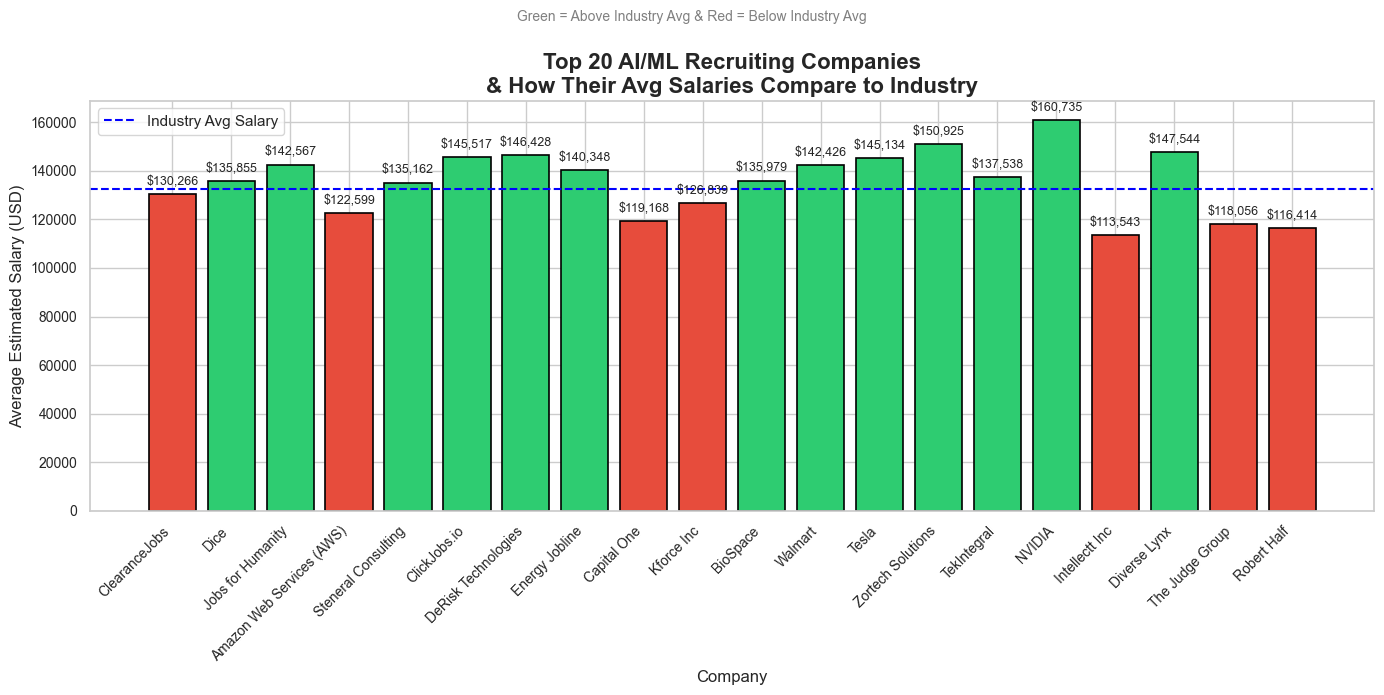

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style
sns.set_theme(style="whitegrid")

# Calculate Industry Average Salary
industry_avg_salary = final_df_cleaned['estimated_salary_usd'].mean()

# Group by company and calculate average salary
company_stats = final_df_cleaned.groupby('company')['estimated_salary_usd'].mean().reset_index()

# Add a column to compare with the industry average salary
company_stats['salary_vs_avg'] = company_stats['estimated_salary_usd'].apply(
    lambda x: 'Above Average' if x > industry_avg_salary else 'Below Average'
)

# Count the number of job titles for each company (job count)
company_job_count = final_df_cleaned.groupby('company')['job_title'].nunique().reset_index()
company_job_count.rename(columns={'job_title': 'job_count'}, inplace=True)

# Merge the job count with company_stats
company_stats = company_stats.merge(company_job_count, on='company')

# Sort top recruiters by job count (descending order)
top_20 = company_stats.sort_values(by='job_count', ascending=False).head(20)

# Create a color map based on salary comparison to industry average
colors = top_20['salary_vs_avg'].map({'Above Average': '#2ecc71', 'Below Average': '#e74c3c'})

# Plot
plt.figure(figsize=(14, 7))

# Create the bar plot
bars = plt.bar(top_20['company'], top_20['estimated_salary_usd'], color=colors, edgecolor='black', linewidth=1.2)

# Add average salary line
plt.axhline(industry_avg_salary, color='blue', linestyle='--', label='Industry Avg Salary')

# Annotate bars with actual salary values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 2500, f"${int(height):,}",
             ha='center', va='bottom', fontsize=9, fontweight='medium')

# Labels & Title
plt.title("Top 20 AI/ML Recruiting Companies\n& How Their Avg Salaries Compare to Industry", fontsize=16, weight='bold')
plt.suptitle("Green = Above Industry Avg & Red = Below Industry Avg", fontsize=10, color='gray', y=0.99)

plt.xlabel("Company", fontsize=12)
plt.ylabel("Average Estimated Salary (USD)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()


**Conclusion :** The chart illustrates the average salaries offered by the top 20 AI/ML recruiting companies compared to the industry average. Most companies (14 out of 20) offer salaries above the industry average, with notable players like NVIDIA and Tesla offering highly competitive pay. However, a few companies such as Walmart and The Judge Group fall below the industry average, suggesting potential areas for improvement in their compensation strategies. Overall, AI/ML professionals should consider both salary levels and company reputation when evaluating job opportunities.

#### **Q6. What are the most commonly required technical skills in AI/ML job descriptions, and how do they vary by job title?**

/var/folders/41/f97k2tlx2xnftr7h0sg_bp4r0000gn/T/ipykernel_2570/2828296365.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_skills, x='Count', y='Skill', palette='viridis')


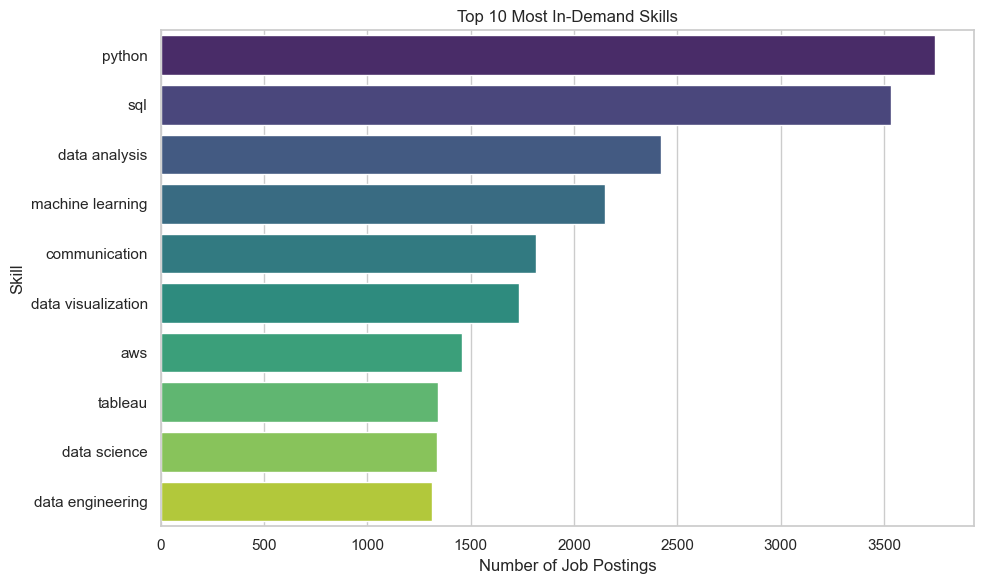

In [43]:
skills_df = final_df_cleaned.copy()
skills_df['skill'] = skills_df['job_skills'].str.split(', ')

skills_df = skills_df.explode('skill')
skills_df['skill'] = skills_df['skill'].str.lower().str.strip()

top_skills = skills_df['skill'].value_counts().head(10).reset_index()
top_skills.columns = ['Skill', 'Count']

# Seaborn barplot
plt.figure(figsize=(10,6))
sns.barplot(data=top_skills, x='Count', y='Skill', palette='viridis')
plt.title('Top 10 Most In-Demand Skills')
plt.xlabel('Number of Job Postings')
plt.ylabel('Skill')
plt.tight_layout()
plt.show()

**Conclusion:** This analysis revealed several key findings. Python and SQL clearly lead in demand, each appearing in over 3,500 postings, highlighting their critical role in data-related jobs. Other technical and soft skills like data analysis, machine learning, and communication also rank highly, showing that employers value a blend of coding ability, analytical thinking, and communication.

#### **Q7. Is there a correlation between the number of listed skills in a job description and the offered salary?**

Pearson correlation coefficient between skill count and salary: 0.058149196942773


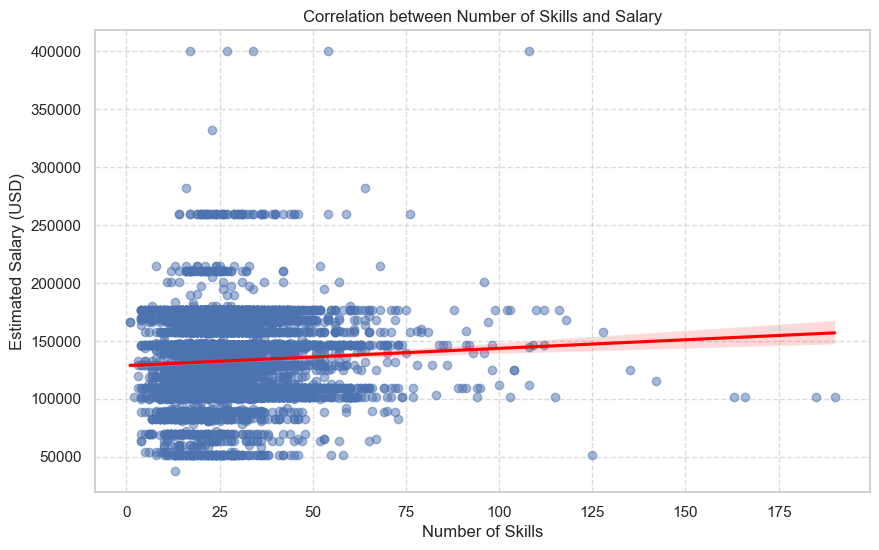

In [44]:
# Calculate the number of skills per job posting
final_df_cleaned['skill_count'] = final_df_cleaned['job_skills'].str.split(',').str.len()

# Calculate the Pearson correlation coefficient
correlation = final_df_cleaned['skill_count'].corr(final_df_cleaned['estimated_salary_usd'], method='pearson')

print(f"Pearson correlation coefficient between skill count and salary: {correlation}")

# Create the scatter plot (optional, but helpful for visualization)
plt.figure(figsize=(10, 6))
sns.regplot(x='skill_count', y='estimated_salary_usd', data=final_df_cleaned, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Correlation between Number of Skills and Salary')
plt.xlabel('Number of Skills')
plt.ylabel('Estimated Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Conclusion :** Based on the Pearson correlation coefficient (r ≈ 0.058), we observe a very weak positive correlation between the number of listed skills in a job posting and the offered salary. This suggests that simply listing more skills does not strongly influence salary levels in AI/ML roles.

This insight aligns with industry expectations, where depth and relevance of specific technical skills (e.g., deep learning, cloud computing, MLOps) are more valued than the sheer number of tools mentioned.

Therefore, the quality and specialization of skills play a bigger role in compensation than quantity, especially in high-paying, advanced AI/ML roles.

### 3.3 Final Application of Insights

The insights from our analysis can be valuable to both job seekers and employers navigating the evolving data job market:

- **For job seekers:**
  
  This analysis identifies the most in-demand skills (e.g., Python, SQL, machine learning) and job titles, helping candidates prioritize learning and tailor their resumes toward high-salary, high-demand roles. It also highlights the potential benefits of remote work, which appears to command slightly higher salaries on average.

- **For employers and recruiters:**
  
  Companies can use our findings to benchmark salary offerings based on job title and experience level, ensuring competitive compensation to attract top talent. The geographic and job-level trends can guide targeted job postings and strategic hiring (e.g., focusing recruitment in regions with high interest or talent density).

- **For future development:**
  
  These results could inform the creation of a dynamic job recommendation engine, a salary prediction model, or even educational program curricula designed to meet market demand.

By aligning skills, compensation, and job structure, this project helps reduce the gap between what companies need and what job seekers offer.

### Thanks for listening — we’re **Sakshi Singh, Walker Oettl, and Raj Barai**, and we’d be happy to answer any questions!

Correlation of all numeric features with Salary:

estimated_salary_usd    1.000000
experience_encoded      0.134289
job_level_encoded       0.134289
skill_count             0.058149
job_type_encoded        0.047328
Name: estimated_salary_usd, dtype: float64


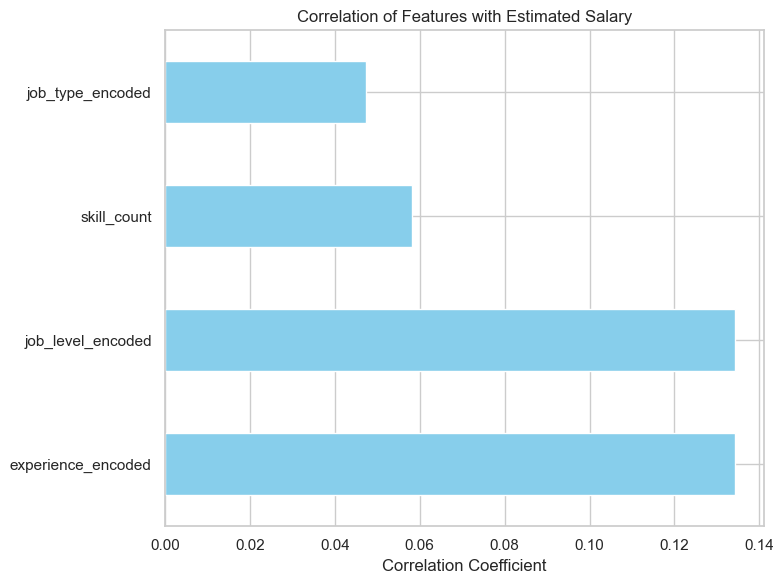

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Copy the original DataFrame
df_corr = final_df_cleaned.copy()

# Encode categorical variables
df_corr['experience_encoded'] = df_corr['experience_level_mapped'].map({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})
df_corr['job_type_encoded'] = df_corr['job_type'].map({'Remote': 1, 'Onsite': 0, 'Hybrid': 0.5})
df_corr['job_level_encoded'] = df_corr['job_level'].map({'Entry': 1, 'Associate': 2, 'Mid senior': 3, 'Senior': 4})  # adjust labels as per your actual data

# Keep only numeric columns
numeric_df = df_corr.select_dtypes(include='number')

# Compute correlation with salary
correlations = numeric_df.corr()['estimated_salary_usd'].sort_values(ascending=False)

# Print all correlations
print("Correlation of all numeric features with Salary:\n")
print(correlations)

# Optional: visualize as barplot
correlations.drop('estimated_salary_usd').plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title('Correlation of Features with Estimated Salary')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()
